# Artificial Neural Network

In [1]:
import os

print("Directorio actual:", os.getcwd())

Directorio actual: /content


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Aqui deben colocar el directorio donde se encuentra su DataSet

### Importing the libraries

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [4]:
tf.__version__

'2.19.0'

## Part 1 - Data Preprocessing

### Importing the dataset

In [5]:
dataset = pd.read_csv('/content/drive/MyDrive/Churn_Modelling.csv')
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

In [6]:
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [7]:
print(y)

[1 0 1 ... 1 1 0]


### Encoding categorical data

Label Encoding the "Gender" column

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

In [9]:
print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


One Hot Encoding the "Geography" column

In [10]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [11]:
print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


### Splitting the dataset into the Training set and Test set

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Feature Scaling

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Part 2 - Building the ANN

## Modificar la arquitectura para cambiar la red de clasificación a regresión

## Hints
### 1. Que arquitectura debe tener una red neuronal para hacer regresión lineal
### 2. Que función de activación se debe utilizar para hacer regresión lineal
### 3. Que funcion de perdida y metrica utilizaria para hacer regresion lineal

### Initializing the ANN

In [14]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [15]:
n_features = X_train.shape[1]
ann.add(tf.keras.Input(shape=(n_features,), name="features"))

In [16]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the second hidden layer

In [17]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the output layer

In [18]:
ann.add(tf.keras.layers.Dense(units=1, activation='linear'))

## Part 3 - Training the ANN

### Compiling the ANN

## Elija el optimizador, perdida y metrica para hacer regresion lineal

In [19]:
ann.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae'])

## No modificar las siguientes celdas

### Training the ANN on the Training set

In [20]:
history = ann.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_test, y_test),   # o (X_val, y_val) si tienes validación separada
    verbose=1
)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.4574 - mae: 0.4930 - val_loss: 0.2055 - val_mae: 0.3604
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1881 - mae: 0.3415 - val_loss: 0.1719 - val_mae: 0.3296
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1641 - mae: 0.3207 - val_loss: 0.1614 - val_mae: 0.3135
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1590 - mae: 0.3149 - val_loss: 0.1563 - val_mae: 0.3213
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1518 - mae: 0.3078 - val_loss: 0.1509 - val_mae: 0.3127
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1468 - mae: 0.3003 - val_loss: 0.1432 - val_mae: 0.2904
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1430 - mae: 0.2898 - val_loss: 0.1368 - val_mae: 0.2845
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1337 - mae: 0.2750 - val_loss: 0.1310 - val_mae: 0.2753
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/

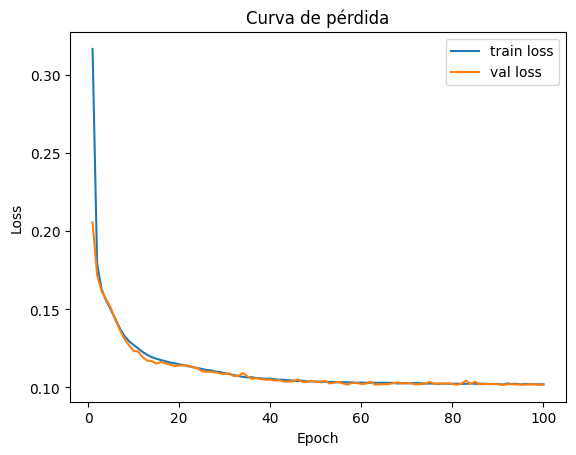

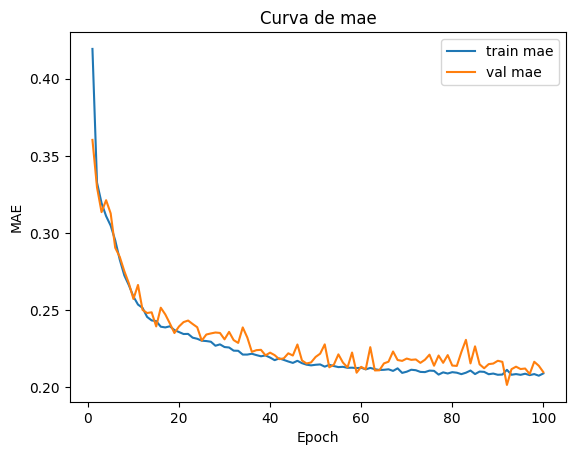

In [21]:
import matplotlib.pyplot as plt

hist = history.history
epochs = range(1, len(hist['loss']) + 1)

# --- Pérdida ---
plt.figure()
plt.plot(epochs, hist['loss'], label='train loss')
plt.plot(epochs, hist.get('val_loss', []), label='val loss')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.legend(); plt.title('Curva de pérdida')
plt.show()

# --- Métrica según el tipo de problema ---
metric_name = None
for name in ['accuracy','acc','mae','mape','mse','rmse']:  # elegimos la que exista
    if name in hist:
        metric_name = name; break

if metric_name:
    plt.figure()
    plt.plot(epochs, hist[metric_name], label=f'train {metric_name}')
    val_key = f'val_{metric_name}'
    if val_key in hist:
        plt.plot(epochs, hist[val_key], label=f'val {metric_name}')
    plt.xlabel('Epoch'); plt.ylabel(metric_name.upper()); plt.legend(); plt.title(f'Curva de {metric_name}')
    plt.show()

## Part 4 - Making the predictions and evaluating the model

### Predicting the result of a single observation

**Homework**

Use our ANN model to predict if the customer with the following informations will leave the bank:

Geography: France

Credit Score: 600

Gender: Male

Age: 40 years old

Tenure: 3 years

Balance: \$ 60000

Number of Products: 2

Does this customer have a credit card? Yes

Is this customer an Active Member: Yes

Estimated Salary: \$ 50000

So, should we say goodbye to that customer?

**Solution**

In [22]:
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
[[False]]


Therefore, our ANN model predicts that this customer stays in the bank!

**Important note 1:** Notice that the values of the features were all input in a double pair of square brackets. That's because the "predict" method always expects a 2D array as the format of its inputs. And putting our values into a double pair of square brackets makes the input exactly a 2D array.

**Important note 2:** Notice also that the "France" country was not input as a string in the last column but as "1, 0, 0" in the first three columns. That's because of course the predict method expects the one-hot-encoded values of the state, and as we see in the first row of the matrix of features X, "France" was encoded as "1, 0, 0". And be careful to include these values in the first three columns, because the dummy variables are always created in the first columns.

### Predicting the Test set results

In [23]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


### Making the Confusion Matrix

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1521   74]
 [ 203  202]]


0.8615